In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Coal
Price in USD/tonne of coal

In [2]:
dfCoal = pd.read_csv('./data/raw/Quantdl - Coal (Daily, US)/DOE-coal.csv')
dfCoal.columns = ['date', 'Central Appalachia', 'Northern Appalachia', 'Illinois Basin', 'Powder River Basin', 'Uinta Basin']
dfCoal = dfCoal.set_index('date').sort_index()
dfCoal.index = pd.to_datetime(dfCoal.index)
dfCoal.head()

,Central Appalachia,Northern Appalachia,Illinois Basin,Powder River Basin,Uinta Basin
date,,,,,
2008-05-06,116.5,105.0,61.25,14.25,43.50
2008-05-13,117.5,105.0,63.25,13.50,43.50
2008-05-20,117.5,108.0,64.25,13.50,51.50
2008-05-27,127.5,122.5,64.25,13.50,51.50
2008-06-11,127.5,122.5,64.50,13.65,51.75


## Natural Gas
Prices in USD/mmBTU

In [3]:
dfNg = pd.read_csv('../data/raw/EIA - Natural gas henry hub daily prices/Natural gas henry hub daily prices.csv', 
                   parse_dates=['Date'])
dfNg.columns = ['date', 'NgPrice']
dfNg = dfNg.set_index('date').sort_index()
dfNg.index = pd.to_datetime(dfNg.index)
dfNg.head()

,NgPrice
date,
1997-01-07,3.82
1997-01-08,3.80
1997-01-09,3.61
1997-01-10,3.92
1997-01-13,4.00


In [6]:
dfNg.to_csv('../data/NGPrices.csv')

## Combined Commodity Prices
Price units are not the same

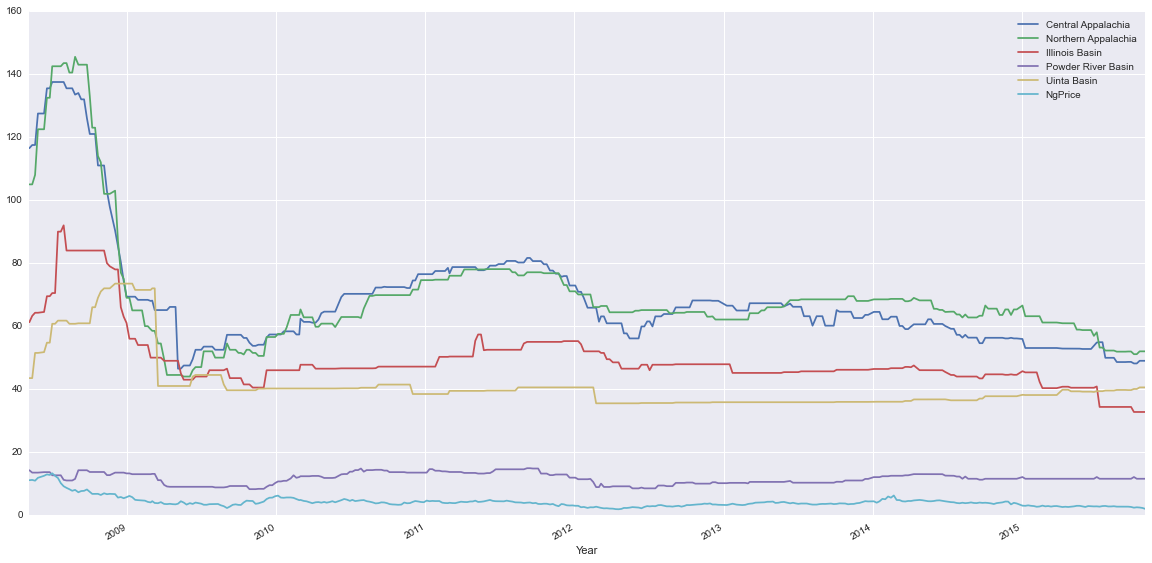

In [16]:
dfCommodity = dfCoal.merge(dfNg, left_index=True, right_index=True)
dfCommodity.plot(figsize=(20,10))
plt.xlabel('Year')

## Resample Weekly Prices to Daily Prices

In [17]:
dfCommodity = dfCommodity.resample('D', fill_method=None).interpolate()
dfCommodity.head()

,Central Appalachia,Northern Appalachia,Illinois Basin,Powder River Basin,Uinta Basin,NgPrice
date,,,,,,
2008-05-06,116.500000,105,61.250000,14.250000,43.5,11.090000
2008-05-07,116.642857,105,61.535714,14.142857,43.5,11.102857
2008-05-08,116.785714,105,61.821429,14.035714,43.5,11.115714
2008-05-09,116.928571,105,62.107143,13.928571,43.5,11.128571
2008-05-10,117.071429,105,62.392857,13.821429,43.5,11.141429


## Write to CSV

In [18]:
dfCommodity.to_csv('./data/commodityPrices.csv')